# Train in Human in the loop (HITL)




In [295]:
# Récuper les labels des noms des images dans le dossier

# parcourir dossier et lister les noms pour récuperer les labels
import os
from pathlib import Path
import re
def natural_key(path):
    return [int(c) if c.isdigit() else c.lower() for c in re.split(r'(\d+)', path.name)]

data_dir = Path("../data/raw2/train/images")
file_paths = sorted(data_dir.iterdir(), key=natural_key)
noms = [p.name for p in file_paths]
classes = ['biodegradable', 'cardboard', 'glass', 'metal', 'paper', 'plastic']

# Si dans les noms qui sont dans labels il y a des noms qui sont dans classes, netoyer labels et garder que noms de classes
labels = []
for name in noms:
    for c in classes:
        if name.startswith(c):
            labels.append(c)
            break
print(labels)
#print(noms)

['biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradabl

In [296]:
for i in range(len(labels)):
    if labels[i] == 'biodegradable':
        labels[i] = 'trash'

In [297]:
# Labels:
#    0: cardboard
#    1: glass
#    2: metal
#    3: paper
#    4: plastic
#    5: trash

def transform_labels_to_int(label : str) -> int:
    match label:
        case 'cardboard':
            return 0
        case 'glass':
            return 1
        case 'metal':
            return 2
        case 'paper':
            return 3
        case 'plastic':
            return 4
        case 'trash':
            return 5


In [298]:
y = [transform_labels_to_int(label) for label in labels]
print(y)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [299]:
import os
import random
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

In [300]:
# Set the random seed for reproducibility
seed = 77

os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

tf.random.set_seed(seed)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

In [301]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32

In [302]:
nom_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [315]:
ds = tf.keras.utils.image_dataset_from_directory(
    "../data/raw2/train/images/.",
    labels=y,
    label_mode='int',
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=False,
    verbose=1,
)

Found 7324 files belonging to 6 classes.


In [304]:
ds.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

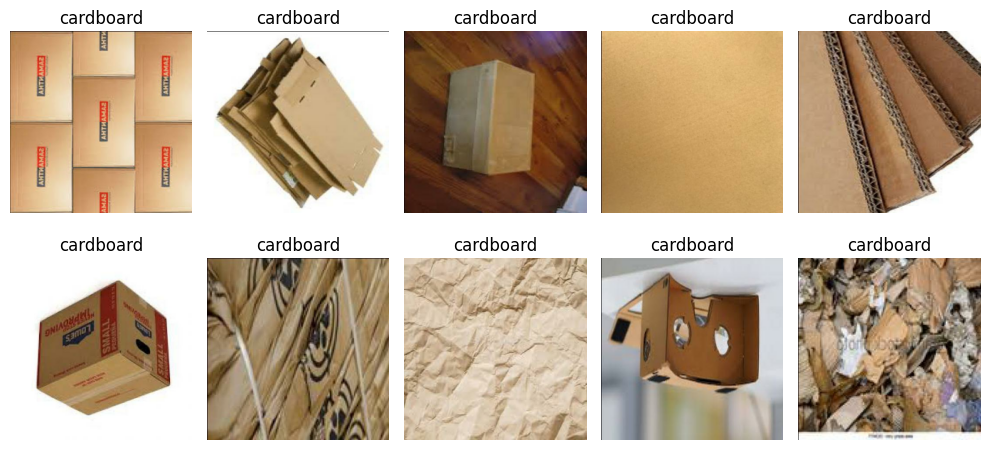

In [310]:
# Plot 10 sample images
plt.figure(figsize=(10, 5), tight_layout=True)
for images, label_idxs in ds.take(60):
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(nom_labels[label_idxs[i].numpy()])
        plt.axis("off")

In [316]:
# Normalize the data
normalization_layer = tf.keras.layers.Rescaling(
    1.0 / 255
)
ds = ds.map(lambda x, y: (normalization_layer(x), y))

In [317]:
# Importer le modèle pré-entraîné de Artifact Registry Google with bentoml

# dvc pull (dossier model)
# bentoml models import /home/cris/mlops/MLOps-project/model/trash_classifier_model.bentomodel
# mettre le chemin absolu du fichier .bentomodel

import bentoml
from bentoml.keras import load_model

# Récupérer la dernière version du modèle importé
model_ref = bentoml.models.get("trash_classifier_model:latest")
print(model_ref)

Model(tag="trash_classifier_model:ciqmwpguswhiypxm")


/tmp/ipykernel_4321/638817549.py:8: BentoMLDeprecationWarning: `bentoml.keras` is deprecated since BentoML v1.4 and will be removed in a future version.
  from bentoml.keras import load_model


In [318]:
# Charger le modèle Keras
model = load_model(model_ref)

In [319]:
import numpy as np
from pathlib import Path

history_path = Path("../model/history.npy")
history = np.load(history_path, allow_pickle=True).item()

prev_epochs = len(history["loss"])
print("Epochs déjà entraînées :", prev_epochs)

Epochs déjà entraînées : 9


In [320]:
# evaluer dataset
preds= model.predict(ds)
#predictions=tf.argmax(preds, axis=1)

229/229 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step


In [321]:
probs = tf.nn.softmax(preds, axis=-1).numpy() # # (N, num_classes)

In [322]:
probs[1]

array([4.6448208e-06, 1.2091840e-04, 5.1640876e-07, 1.3381970e-04,
       9.7463909e-04, 9.9876547e-01], dtype=float32)

In [323]:
print(transform_labels_to_int(labels[1]))

5


In [324]:
# index de la classe prédite pour chaque image
y_pred = tf.argmax(probs, axis=-1).numpy()       # (N,)

#y_true = [transform_labels_to_int(label) for label in labels]

In [ ]:
y_true = np.array(y_true)

In [ ]:
nom_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [325]:
y_pred

array([5, 5, 3, ..., 4, 4, 1], shape=(7324,))

In [333]:
y = np.array(y)

In [335]:
from sklearn.metrics import classification_report

report = classification_report(y, y_pred, target_names=nom_labels)
print(report)

              precision    recall  f1-score   support

   cardboard       0.83      0.82      0.83      1006
       glass       0.92      0.77      0.84      1854
       metal       0.80      0.77      0.78       874
       paper       0.77      0.69      0.72      1223
     plastic       0.80      0.67      0.73       813
       trash       0.68      0.95      0.79      1554

    accuracy                           0.79      7324
   macro avg       0.80      0.78      0.78      7324
weighted avg       0.80      0.79      0.79      7324



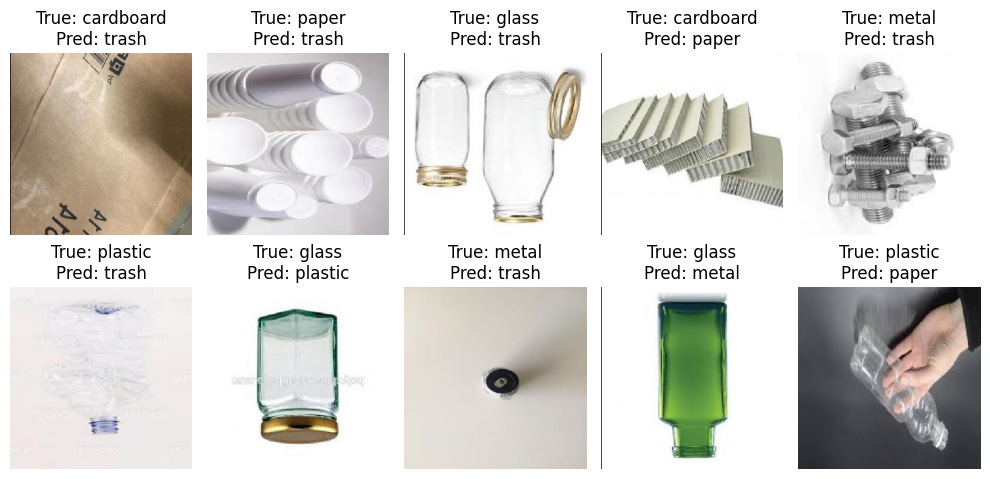

In [336]:
# Afficher les images mal classées aléatoirement 

misclassified_indices = np.where(y != y_pred)[0]
np.random.shuffle(misclassified_indices)
plt.figure(figsize=(10, 5), tight_layout=True)
for i, index in enumerate(misclassified_indices[:10]):
    ax = plt.subplot(2, 5, i + 1)
    img_path = os.path.join(data_dir, noms[index])
    img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
    plt.imshow(img)
    plt.title(f"True: {nom_labels[y_true[index]]}\nPred: {nom_labels[y_pred[index]]}")
    plt.axis("off")